<a href="https://colab.research.google.com/github/ArvidLev/CatVSDogs/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs
For this project I am trying to classifiy pictures of dogs and cats using Convolutional neaural networks with Tensorflow and Keras. 
I am first designing my own network and then I will use transfer learning to compare my results to the MobileNet V2 made by Google with weights from ImageNet.

First, we get all the pictures from a google drive and create directories.

In [1]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
import matplotlib.pyplot as plt  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 146MB/s]


Now we design our neural network and the we preprocess our data. We are also going to increse our training data by using data augmentation. 

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 1e-4),
              metrics = ['accuracy'])

# All images will be rescaled by 1./255 and the training set will be augmented as well.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size = (150, 150),  # All images will be resized to 150x150
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary'
        )

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
history = model.fit(
      train_generator,
      epochs = 10,
      validation_data=validation_generator,
      verbose = 2)

Epoch 1/15
100/100 - 51s - loss: 0.6959 - accuracy: 0.5005 - val_loss: 0.6911 - val_accuracy: 0.5110
Epoch 2/15
100/100 - 20s - loss: 0.6903 - accuracy: 0.5315 - val_loss: 0.6815 - val_accuracy: 0.5740
Epoch 3/15
100/100 - 20s - loss: 0.6765 - accuracy: 0.5825 - val_loss: 0.6565 - val_accuracy: 0.6100
Epoch 4/15
100/100 - 20s - loss: 0.6641 - accuracy: 0.5980 - val_loss: 0.6787 - val_accuracy: 0.5420
Epoch 5/15
100/100 - 20s - loss: 0.6434 - accuracy: 0.6205 - val_loss: 0.6170 - val_accuracy: 0.6450
Epoch 6/15
100/100 - 20s - loss: 0.6360 - accuracy: 0.6340 - val_loss: 0.5926 - val_accuracy: 0.6790
Epoch 7/15
100/100 - 20s - loss: 0.6257 - accuracy: 0.6500 - val_loss: 0.5868 - val_accuracy: 0.6840
Epoch 8/15
100/100 - 20s - loss: 0.6092 - accuracy: 0.6645 - val_loss: 0.5840 - val_accuracy: 0.6870
Epoch 9/15
100/100 - 20s - loss: 0.6085 - accuracy: 0.6625 - val_loss: 0.5915 - val_accuracy: 0.6710
Epoch 10/15
100/100 - 20s - loss: 0.5996 - accuracy: 0.6910 - val_loss: 0.5735 - val_accura

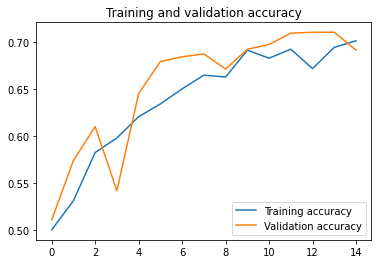

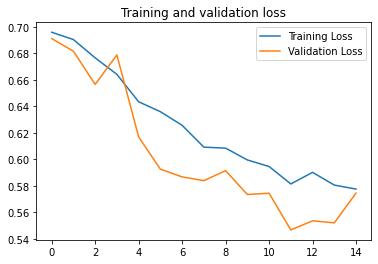

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(acc,  label='Training accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

So we get about 70% accuracy on both the train and validation set. Both the loss and the accuracy seem to improve so it is likely that the model would improve by increasing the number of epochs. The model also does not show any signs of overfitting as of yet.

# Transfer Model
Now we will use pre-trained covnet MobileNet V2 which was developed by Google. We will use ImageNet as weights. We will create our own top layer that we later will train.

In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (150,150, 3),
                                               include_top = False,
                                               weights = 'imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [6]:
base_model.trainable = False

In [7]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [25]:
prediction_layer = tf.keras.layers.Dense(1) # No need to use activation function like 'sigmoid', instead treat as logit.
inputs = tf.keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training = False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
transfer_model = tf.keras.Model(inputs, outputs)


In [26]:
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              32769024  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 35,028,033
Trainable params: 34,631,489
Non-trainable params: 396,544
_________________________________________

In [27]:
base_learning_rate = 0.0001
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
initial_epochs = 10
history1 = transfer_model.fit(train_generator,
      epochs = initial_epochs,
      validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 27s 239ms/step - loss: 0.2947 - accuracy: 0.8810 - val_loss: 0.1649 - val_accuracy: 0.9360
Epoch 2/10
100/100 [==============================] - 23s 229ms/step - loss: 0.2383 - accuracy: 0.9010 - val_loss: 0.1540 - val_accuracy: 0.9640
Epoch 3/10
100/100 [==============================] - 22s 224ms/step - loss: 0.1989 - accuracy: 0.9150 - val_loss: 0.2586 - val_accuracy: 0.8890
Epoch 4/10
100/100 [==============================] - 23s 225ms/step - loss: 0.2051 - accuracy: 0.9220 - val_loss: 0.1213 - val_accuracy: 0.9630
Epoch 5/10
100/100 [==============================] - 22s 220ms/step - loss: 0.1407 - accuracy: 0.9435 - val_loss: 0.1033 - val_accuracy: 0.9630
Epoch 6/10
100/100 [==============================] - 23s 226ms/step - loss: 0.1462 - accuracy: 0.9470 - val_loss: 0.1832 - val_accuracy: 0.9560
Epoch 7/10
100/100 [==============================] - 23s 227ms/step - loss: 0.1713 - accuracy: 0.9280 - val_loss: 0.1031 - val_ac

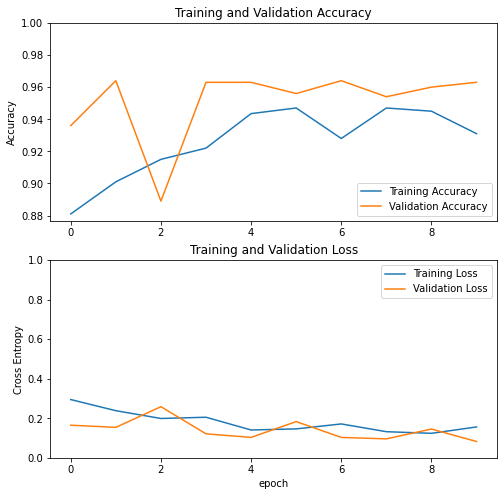

In [29]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine Tune Transfer Model
Now we are going train some of the layers of the MobileNet to hopefully get some better preformance.

In [30]:
base_model.trainable = True

In [31]:
print('Number of layers in the base model: ', len(base_model.layers))

Number of layers in the base model:  154


We are going to retrain 54 of the last layers.

In [32]:
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [33]:
transfer_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate =base_learning_rate/10),
              metrics=['accuracy'])

We are continuing from where we left of but now we are also traing the last 54 layers of the MobileNet.

In [34]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history2 = transfer_model.fit(train_generator,
      epochs = total_epochs,
      initial_epoch = history1.epoch[-1],
      validation_data = validation_generator)

Epoch 10/20
100/100 [==============================] - 30s 243ms/step - loss: 0.0641 - accuracy: 0.9750 - val_loss: 0.1283 - val_accuracy: 0.9700
Epoch 11/20
100/100 [==============================] - 23s 234ms/step - loss: 0.0734 - accuracy: 0.9710 - val_loss: 0.1395 - val_accuracy: 0.9740
Epoch 12/20
100/100 [==============================] - 23s 233ms/step - loss: 0.0562 - accuracy: 0.9770 - val_loss: 0.1496 - val_accuracy: 0.9700
Epoch 13/20
100/100 [==============================] - 23s 234ms/step - loss: 0.0633 - accuracy: 0.9775 - val_loss: 0.1214 - val_accuracy: 0.9720
Epoch 14/20
100/100 [==============================] - 24s 236ms/step - loss: 0.0669 - accuracy: 0.9710 - val_loss: 0.1384 - val_accuracy: 0.9700
Epoch 15/20
100/100 [==============================] - 23s 234ms/step - loss: 0.0620 - accuracy: 0.9765 - val_loss: 0.1500 - val_accuracy: 0.9700
Epoch 16/20
100/100 [==============================] - 23s 231ms/step - loss: 0.0564 - accuracy: 0.9790 - val_loss: 0.1714 -

In [35]:
acc += history2.history['accuracy']
val_acc += history2.history['val_accuracy']

loss += history2.history['loss']
val_loss += history2.history['val_loss']

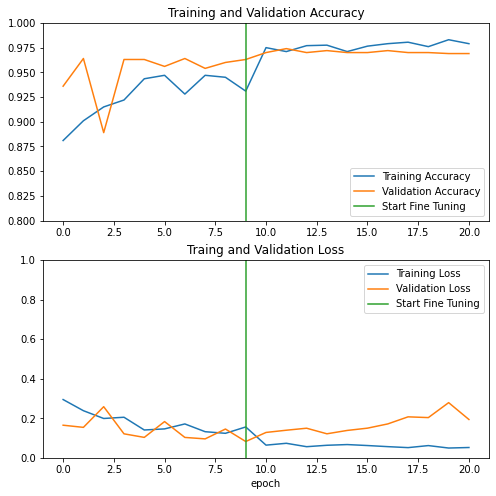

In [36]:
plt.figure(figsize = (8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs - 1, initial_epochs - 1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs - 1, initial_epochs - 1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc = 'upper right')
plt.title('Traing and Validation Loss')
plt.xlabel('epoch')
plt.show()

As we can see, retraining the last layers of the MobileNet did increase the performance of the model to about 97% from 96%. However, judging by how the validation loss is starting to increase, it seems like we might be starting to overfit our model to the training data.